# <center>Learning how to play Space Invaders with RL.</center>

![space invaders poster image](https://cdn-images-1.medium.com/max/1200/1*Ya6drllhmC82yh0J-elrPA.jpeg)

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17445191395011584328
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3340500992
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6213361498830098811
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [2]:
import gym
import numpy as np
from dqn.model import Model
from dqn.train import Train 
from dqn.dqnAgent import DQNAgent
import matplotlib.pyplot as plt

from gym.wrappers.atari_preprocessing import AtariPreprocessing
from baselines.common.atari_wrappers import NoopResetEnv, MaxAndSkipEnv, wrap_deepmind

Using TensorFlow backend.


In [3]:
env = gym.make('SpaceInvaders-v0')

env = NoopResetEnv(env)
env = MaxAndSkipEnv(env)
env = wrap_deepmind(env, episode_life=False, clip_rewards=True, frame_stack=True, scale=False)

**Observation space**: the observation space consists on 3 sequential images of size 210x160

**Action space**: there are 6 possible actions: *left, right, shoot, left-shoot, right-shoot, do nothing*.

In [4]:
print(env.observation_space.shape)
print(env.action_space)

(84, 84, 4)
Discrete(6)


### Agent acting randomly

In [5]:
# Example of how env works
total_reward = 0
env.reset()
while True:
    env.render()
    next_state, reward, done, info = env.step((env.action_space.sample())) # select random action
    total_reward += reward
    if done:
        print(total_reward)
        break
        
env.close()

7.0


### State sequence

Each state will look like a sequence of 4 frames. Every frame is cropped and preprocessed for faster and more efficient computations.

(4, 84, 84)


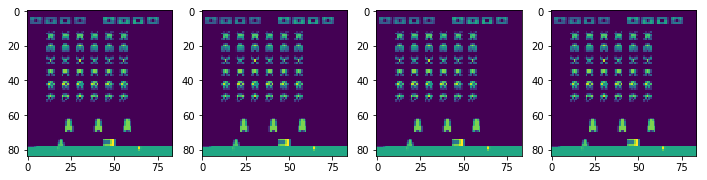

In [6]:
env.reset()

# Create a new state
next_state, reward, done, info = env.step((env.action_space.sample())) # select random action

print(np.asarray(next_state).transpose(2, 0, 1).shape)
# Plot the state
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
ax = axes.ravel()

for i, frame in enumerate(np.asarray(next_state).transpose(2, 0, 1)):
    ax[i].imshow(frame)

### Establishing a benchmark

I'll be using two benchmarks:
* The performance of an agent without training over 60 games
* The performance of a human

In [9]:
episodes_eval = 60
agent_bench = DQNAgent()
benchmark = Train(env, agent_bench)

# Evaluate performance
benchmark.train(episodes_eval, learn=False, render=False)

# Plot rewards
benchmark.plot_rewards()

episode: 13, score: 7.0:  22%|██▏       | 13/60 [00:04<00:15,  3.01it/s] 

KeyboardInterrupt: 

## Training

In [10]:
episodes_train = 700
agent_train = DQNAgent()

train = Train(env, agent_train)
# Train the agent
train.train(episodes_train, learn=True, render=False)

# Plot rewards
train.plot_rewards()


episode: 2, score: 2.0:   0%|          | 1/700 [00:03<34:26,  2.96s/it]

KeyboardInterrupt: 



  0%|          | 0/60 [00:00<?, ?it/s]

episode: 1, score: 18.0:   0%|          | 0/60 [00:00<?, ?it/s]

episode: 1, score: 18.0:   2%|▏         | 1/60 [00:00<00:27,  2.12it/s]

episode: 2, score: 14.0:   2%|▏         | 1/60 [00:01<00:27,  2.12it/s]

episode: 2, score: 14.0:   3%|▎         | 2/60 [00:01<00:30,  1.88it/s]

episode: 3, score: 5.0:   3%|▎         | 2/60 [00:01<00:30,  1.88it/s] 

episode: 3, score: 5.0:   5%|▌         | 3/60 [00:01<00:25,  2.24it/s]

episode: 4, score: 9.0:   5%|▌         | 3/60 [00:01<00:25,  2.24it/s]

episode: 4, score: 9.0:   7%|▋         | 4/60 [00:01<00:23,  2.39it/s]

episode: 5, score: 21.0:   7%|▋         | 4/60 [00:02<00:23,  2.39it/s]

episode: 5, score: 21.0:   8%|▊         | 5/60 [00:02<00:26,  2.07it/s]

episode: 6, score: 19.0:   8%|▊         | 5/60 [00:02<00:26,  2.07it/s]

episode: 6, score: 19.0:  10%|█         | 6/60 [00:02<00:25,  2.13it/s]

episode: 7, score: 23.0:  10%|█         | 6/60 [00:03<00:25,  2.13it/s]

episode: 7, score: 2

episode: 51, score: 8.0:  85%|████████▌ | 51/60 [00:19<00:03,  2.83it/s]

episode: 52, score: 29.0:  85%|████████▌ | 51/60 [00:20<00:03,  2.83it/s]

episode: 52, score: 29.0:  87%|████████▋ | 52/60 [00:20<00:03,  2.03it/s]

episode: 53, score: 8.0:  87%|████████▋ | 52/60 [00:20<00:03,  2.03it/s] 

episode: 53, score: 8.0:  88%|████████▊ | 53/60 [00:20<00:03,  2.21it/s]

episode: 54, score: 11.0:  88%|████████▊ | 53/60 [00:20<00:03,  2.21it/s]

episode: 54, score: 11.0:  90%|█████████ | 54/60 [00:20<00:02,  2.13it/s]

episode: 55, score: 16.0:  90%|█████████ | 54/60 [00:21<00:02,  2.13it/s]

episode: 55, score: 16.0:  92%|█████████▏| 55/60 [00:21<00:02,  2.07it/s]

episode: 56, score: 5.0:  92%|█████████▏| 55/60 [00:21<00:02,  2.07it/s] 

episode: 56, score: 5.0:  93%|█████████▎| 56/60 [00:21<00:01,  2.46it/s]

episode: 57, score: 18.0:  93%|█████████▎| 56/60 [00:22<00:01,  2.46it/s]

episode: 57, score: 18.0:  95%|█████████▌| 57/60 [00:22<00:01,  2.27it/s]

episode: 58, score: 13.0:  9

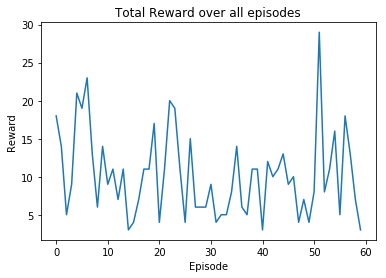

In [11]:
# Evaluate the trained agent
episodes_eval = 60
agent_trained = train.agent
evaluation = Train(env, agent_trained)

# Evaluate performance
evaluation.train(episodes_eval, learn=False, render=False)

# Plot rewards
evaluation.plot_rewards()